<a href="https://colab.research.google.com/github/cindykhris/SummerInternship2020/blob/master/SummerInternship2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pine Biotech Summer Reasearch

**Cindy Pino**


Abstract: In this study, we will analyze the gene expression differnt coronaviruses (CoVs) infections to determine how each virus differs when causing a disease. Here, we focuses the analysis on samples from SARS-CoV-1, MERS, and SARS-CoV-2. 
The raw sequence data (fastq files) for the SARS-CoV-1 was downloaded from GEO [GSE56192](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE56192), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the SARS-CoV-2 infections were downloaded from GEO [GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the MERS infections were downloaded from GEO [GSE139516](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE139516), including their corresponding Mock-treated controls.

In this Jupyter notebook, I will use both R and Python to analyze three viruses: MERS, SARS-CoV-1,  and SARS-CoV-2. I selected the transcriptomic data (gene expression), taking raw FASTQ files of the sequenced of mock and virus infected tissues. I analyzed this sequences to understand how genes are expressed in these three different tissues infected with the coronaviruses. Differences in gene expression are useful to understand how samples are comparable to each other; however, the downside to gene expression patters is the thousands of genes and how to sort through manually. I used Principal Component Analysis - a dimensionality reduction method to help with the cleaning and analysis. 

##Preparing the Notebook
First, let's active R magic. Don't forget to use %%R before running a R code 


---

In [106]:
#active R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


###Python

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###R

In [85]:
%%R
# Example package installation and plotting
install.packages("ggplot2")
#ggplot2::ggplot(mtcars, ggplot2::aes(x = am, y = disp)) + ggplot2::geom_point()

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3054431 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [86]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

R[write to console]: Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

R[write to console]: Installing package(s) 'DESeq2'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.10/bioc/src/contrib/DESeq2_1.26.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2060061 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

In [87]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("EnhancedVolcano")




R[write to console]: Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

R[write to console]: Installing package(s) 'EnhancedVolcano'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.10/bioc/src/contrib/EnhancedVolcano_1.4.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 6792911 bytes (6.5 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [88]:
%%R
install.packages("tidyverse")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 712837 bytes (696 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [7]:
%%R
install.packages('dplyr')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 935654 bytes (913 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [89]:
%%R
install.packages('ggplot2')


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3054431 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri


## SARS-CoV
Severe Acute Respiratory Syndrom Coronavirus (SARS-CoV) was first identified in 20013 (WHO). 

**Pipeline Workflow**



*   PreProcessing
    
      * PCR clean - to remove duplicates from the PCR run  thus reducing redundancy. 
      * Trimmomatic - removes adapter sequences
*   Mapping 
      * Bowtie-2t
* Quantification 

    * RSEM -  Fragment Per Kilobase of transcript per Million mapped reads  for Paired-End Reads







### Upload and clean the file 
The dataset contains the ene expression of SARS and Mocks samples. 

* log transformation and noralization
* filter out genes with very low expression (indistinguishable from noise
* RNA-seq visualization 
    * histagram, boxplot, heatmap 



In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [111]:
#Upload SARS gene expression
dataframe = pd.read_table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt', )


In [109]:
##Upload MERS gene expression
dataframeMers = pd.read_table('drive/My Drive/SummerResearch/prjna580021_expression_genes.txt', )
dataframeMers.head(5)

,id,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,ENSG00000000003.13,0.0,0.0,0.0,656.00,773.00,1085.00,87.00,66.00,63.00,820.00,789.00,670.00
1,ENSG00000000419.11,0.0,0.0,0.0,434.00,467.00,755.00,76.00,62.00,54.00,611.00,542.00,431.00
2,ENSG00000000457.12,0.0,0.0,0.0,79.14,101.48,145.85,65.88,60.55,39.85,147.78,133.15,138.18
3,ENSG00000000460.15,0.0,0.0,0.0,394.86,398.52,546.15,165.12,170.45,183.15,556.62,471.35,484.82
4,ENSG00000000938.11,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [112]:
##Upload COV-19 gene expression
dataframeCOV = pd.read_table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt', )


In [11]:
data = pd.DataFrame({'id': 'group', 
        'group_1_sample_1_SRR1192353_PE': 'Normal',
       'group_1_sample_2_SRR1192354_PE': 'Normal', 
        'group_1_sample_3_SRR1192370_PE': 'Normal',
       'group_1_sample_4_SRR1192371_PE': 'Normal', 
        'group_1_sample_5_SRR1192398_PE': 'Normal',
       'group_1_sample_6_SRR1192399_PE': 'Normal', 
        'group_2_sample_1_SRR1193100_PE': 'SARS',
       'group_2_sample_2_SRR1193101_PE': 'SARS',
        'group_2_sample_3_SRR1193013_PE': 'SARS',
       'group_2_sample_4_SRR1193014_PE': 'SARS', 
        'group_2_sample_5_SRR1193016_PE': 'SARS',
       'group_2_sample_6_SRR1193017_PE': 'SARS'
       }, index=[0])
data.head()

,id,group_1_sample_1_SRR1192353_PE,group_1_sample_2_SRR1192354_PE,group_1_sample_3_SRR1192370_PE,group_1_sample_4_SRR1192371_PE,group_1_sample_5_SRR1192398_PE,group_1_sample_6_SRR1192399_PE,group_2_sample_1_SRR1193100_PE,group_2_sample_2_SRR1193101_PE,group_2_sample_3_SRR1193013_PE,group_2_sample_4_SRR1193014_PE,group_2_sample_5_SRR1193016_PE,group_2_sample_6_SRR1193017_PE
0,group,Normal,Normal,Normal,Normal,Normal,Normal,SARS,SARS,SARS,SARS,SARS,SARS


In [23]:
df = pd.concat([data,dataframe]).reset_index(drop = True)
df.head(5)

,id,group_1_sample_1_SRR1192353_PE,group_1_sample_2_SRR1192354_PE,group_1_sample_3_SRR1192370_PE,group_1_sample_4_SRR1192371_PE,group_1_sample_5_SRR1192398_PE,group_1_sample_6_SRR1192399_PE,group_2_sample_1_SRR1193100_PE,group_2_sample_2_SRR1193101_PE,group_2_sample_3_SRR1193013_PE,group_2_sample_4_SRR1193014_PE,group_2_sample_5_SRR1193016_PE,group_2_sample_6_SRR1193017_PE,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,group,Normal,Normal,Normal,Normal,Normal,Normal,SARS,SARS,SARS,SARS,SARS,SARS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000000003.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,656.00,773.00,1085.00,87.00,66.00,63.00,820.00,789.00,670.00
2,ENSG00000000419.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,434.00,467.00,755.00,76.00,62.00,54.00,611.00,542.00,431.00
3,ENSG00000000457.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,79.14,101.48,145.85,65.88,60.55,39.85,147.78,133.15,138.18
4,ENSG00000000460.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,394.86,398.52,546.15,165.12,170.45,183.15,556.62,471.35,484.82


In [19]:
new_df = df
new_df = new_df.rename(columns={
     'group_1_sample_1_SRR1192353_PE': 'SRR1192353_PE',
       'group_1_sample_2_SRR1192354_PE': 'SRR1192354_PE', 
        'group_1_sample_3_SRR1192370_PE': 'SRR1192370_PE',
       'group_1_sample_4_SRR1192371_PE': 'SRR1192371_PE', 
        'group_1_sample_5_SRR1192398_PE': 'SRR1192398_PE',
       'group_1_sample_6_SRR1192399_PE': 'SRR1192399_PE', 
        'group_2_sample_1_SRR1193100_PE': 'SRR1193100_PE',
       'group_2_sample_2_SRR1193101_PE': 'SRR1193101_PE',
        'group_2_sample_3_SRR1193013_PE': 'SRR1193013_PE',
       'group_2_sample_4_SRR1193014_PE': 'SRR1193014_PE', 
        'group_2_sample_5_SRR1193016_PE': 'SRR1193016_PE',
       'group_2_sample_6_SRR1193017_PE': 'SRR1193017_PE'
       })
new_df.head()

,id,SRR1192353_PE,SRR1192354_PE,SRR1192370_PE,SRR1192371_PE,SRR1192398_PE,SRR1192399_PE,SRR1193100_PE,SRR1193101_PE,SRR1193013_PE,SRR1193014_PE,SRR1193016_PE,SRR1193017_PE
0,group,Normal,Normal,Normal,Normal,Normal,Normal,SARS,SARS,SARS,SARS,SARS,SARS
1,ENSG00000000003.13,1005,1016.58,1011,952,979,921,605.01,623,627,642,578,564
2,ENSG00000000419.11,1407,1360,1702,1645,1193,1233,1269,1268,1103,1066,1118,1103
3,ENSG00000000457.12,386.15,371.19,369.27,340.79,328.45,364.65,247.37,270.26,223.31,248.28,234.34,245.02
4,ENSG00000000460.15,374.02,339.9,232.66,238.59,314.8,335.48,243.82,280.23,236.33,242.07,234.65,247.01


In [20]:
from tabulate import tabulate
f = open('sars.txt','w')
f.write(tabulate(new_df))
f.close()

In [ ]:
#removing all zeroes
new_df.loc[~(new_df==0).all(axis=1)]
#removing all nas
new_df.dropna(how='all')

,id,SRR1192353_PE,SRR1192354_PE,SRR1192370_PE,SRR1192371_PE,SRR1192398_PE,SRR1192399_PE,SRR1193100_PE,SRR1193101_PE,SRR1193013_PE,SRR1193014_PE,SRR1193016_PE,SRR1193017_PE
0,group,Normal,Normal,Normal,Normal,Normal,Normal,SARS,SARS,SARS,SARS,SARS,SARS
1,ENSG00000000003.13,1005,1016.58,1011,952,979,921,605.01,623,627,642,578,564
2,ENSG00000000419.11,1407,1360,1702,1645,1193,1233,1269,1268,1103,1066,1118,1103
3,ENSG00000000457.12,386.15,371.19,369.27,340.79,328.45,364.65,247.37,270.26,223.31,248.28,234.34,245.02
4,ENSG00000000460.15,374.02,339.9,232.66,238.59,314.8,335.48,243.82,280.23,236.33,242.07,234.65,247.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33249,ENSG00000281903.1,7.09,6.73,15.49,15.81,14.93,10.78,11.07,9.68,11.85,11.87,14.64,9
33250,ENSG00000281904.1,0,1,2.94,3,1,1,4,4,1,1.01,4,2
33251,ENSG00000281909.1,1,0,4.99,0,0,3,0,1.27,0,0,3,1
33252,ENSG00000281912.1,3,4,3,1,8,6,8,7,6,2,4,5


In [ ]:
%%R
df = read.table('drive/My Drive/SummerResearch/sars.txt',skip = 1, header = TRUE)
head(df,2)

  X0              group Normal Normal.1 Normal.2 Normal.3 Normal.4 Normal.5
1  1 ENSG00000000003.13 1005.0  1016.58   1011.0    952.0    979.0    921.0
2  2 ENSG00000000419.11 1407.0   1360.0   1702.0   1645.0   1193.0   1233.0
    SARS SARS.1 SARS.2 SARS.3 SARS.4 SARS.5
1 605.01  623.0  627.0  642.0  578.0  564.0
2 1269.0 1268.0 1103.0 1066.0 1118.0 1103.0


In [ ]:
%%R
# use glimse to quickly look at the column names and data type
glimpse(df)

R[write to console]: Error in glimpse(df) : could not find function "glimpse"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in glimpse(df) : could not find function "glimpse"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
# Cleaning the file for processing
ColNames1 <- df$id #take the column name
df = df[,-1] #take the data part - numeric values
df=as.matrix(df)
df

Streaming output truncated to the last 5000 lines.
 [4107,]   1157.00   1172.00    964.00    937.00   1006.00   1012.00    620.00
 [4108,]   1810.00   1756.00   1627.00   1524.00   1507.00   1507.00   1066.00
 [4109,]      4.00      5.00      4.00      2.00      3.00      6.00      5.00
 [4110,]   1162.09   1120.00   1088.58    989.00   1028.00   1021.00    653.00
 [4111,]   1248.00   1179.00   1415.00   1436.00   1122.00   1143.00    771.00
 [4112,]     11.53     12.85      7.83      3.02      6.85      5.36     12.53
 [4113,]    120.00    116.00     66.00     72.00     88.00     99.00    101.00
 [4114,]    313.00    299.88    391.00    340.79    253.01    269.00    274.00
 [4115,]      2.00      0.00      2.00      2.00      1.00      0.00      0.00
 [4116,]      0.00      0.00      0.00      0.00      1.00      0.00      0.00
 [4117,]    277.00    225.00    237.00    247.00    235.00    232.00    148.00
 [4118,]  13020.12  12881.88  13179.86  13174.41  11615.96  11342.91  10294.69
 

In [ ]:
%%R
# filter values higher or less than #
#data = df[which(df[,2]>1),]
#data = df[which(df[,2]<1),]


NULL


In [ ]:
%%R
#remove a header 
names(df) <- NULL


In [ ]:
%%R
#remove NAs from dataset
cleandata <- na.exclude(df)

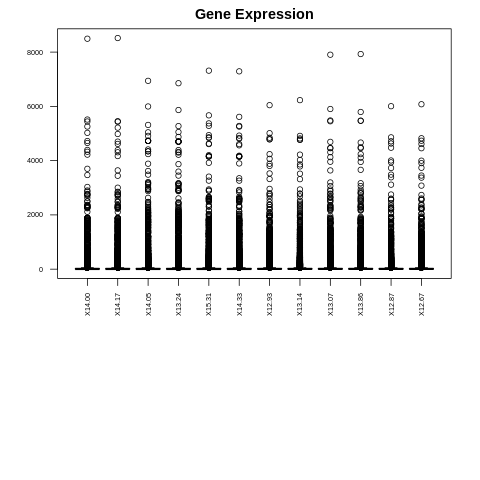

In [ ]:
%%R
#Basic Settings:

colors <- c(rep('red',6),rep('blue',3),rep('green',2),rep('gray',2))
par(mar=c(14,4,2,2))
boxplot(df, main="Gene Expression",las = 2, cex.axis=0.6)


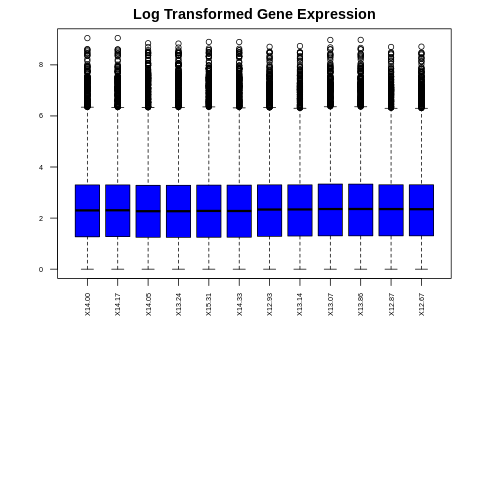

In [ ]:
%%R
#Log transformation
logdata <- log(df+1)
par(mar=c(14,4,2,2))
boxplot(logdata, main="Log Transformed Gene Expression", col = 'blue', las = 2, cex.axis=0.6)


In [ ]:
%%R
#Descriptive statistics
summary(df)

     X14.00            X14.17            X14.05            X13.24       
 Min.   :   0.00   Min.   :   0.00   Min.   :   0.00   Min.   :   0.00  
 1st Qu.:   2.55   1st Qu.:   2.58   1st Qu.:   2.48   1st Qu.:   2.47  
 Median :   8.98   Median :   9.03   Median :   8.67   Median :   8.67  
 Mean   :  46.00   Mean   :  45.98   Mean   :  49.29   Mean   :  49.19  
 3rd Qu.:  26.11   3rd Qu.:  26.11   3rd Qu.:  25.63   3rd Qu.:  25.67  
 Max.   :8494.14   Max.   :8518.84   Max.   :6941.47   Max.   :6853.46  
     X15.31             X14.33            X12.93             X13.14        
 Min.   :   0.000   Min.   :   0.00   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:   2.487   1st Qu.:   2.49   1st Qu.:   2.610   1st Qu.:   2.660  
 Median :   8.785   Median :   8.75   Median :   9.325   Median :   9.365  
 Mean   :  47.898   Mean   :  47.84   Mean   :  43.011   Mean   :  43.016  
 3rd Qu.:  25.885   3rd Qu.:  25.90   3rd Qu.:  26.163   3rd Qu.:  26.170  
 Max.   :7316.370   Max.   :7291.

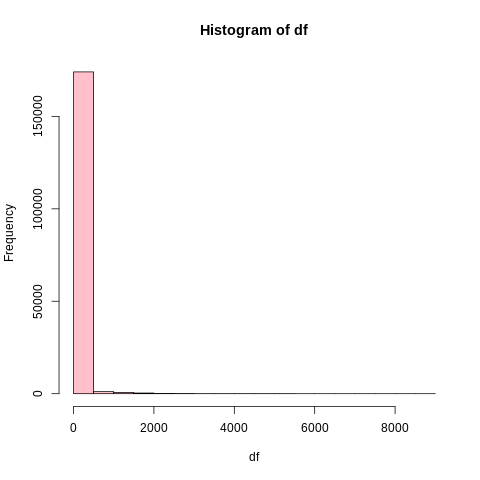

In [ ]:
%%R
hist(df, col='pink')


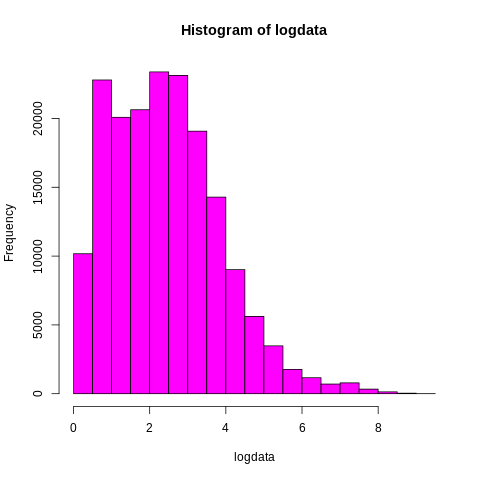

In [ ]:
%%R
hist(logdata, col='magenta')

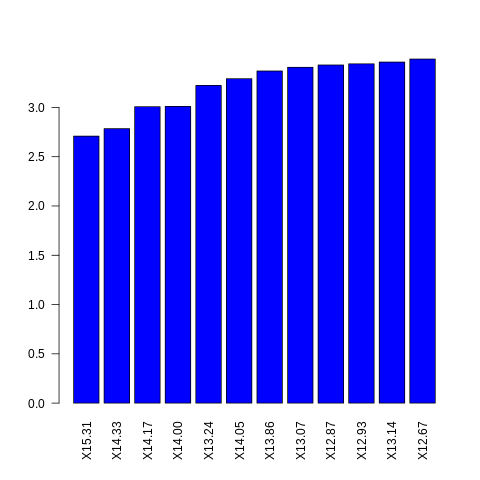

In [ ]:
%%R
barplot(sort(logdata[100,]), col = "blue", main = ColNames1[2], font.axis=1, cex.axis=1, las=2)


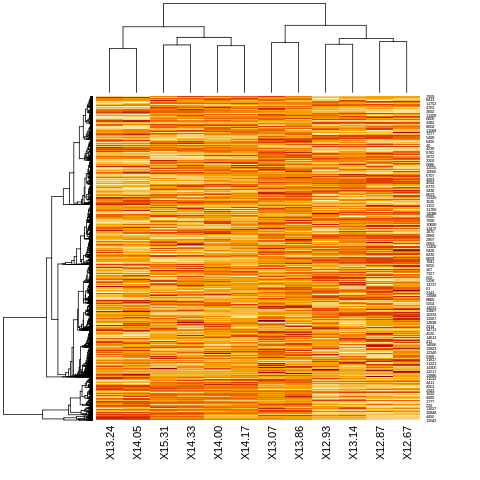

In [ ]:
%%R
heatmap(logdata)

###DESEQ2

In [ ]:
%%R
#Load dataset
PDXdataset = read.table('https://drive.google.com/uc?export=download&id=1tb_qnLwjeAf0B5gWmi7_6SGOqy44dU8x', header = TRUE,row.names = 1, sep='\t')


In [ ]:
%%R
#Define data and remove id column
data <- (PDXdataset)
colnames(PDXdataset) -> names
meta_classes<- c('ER','ER','ER','ER', 'ER', 'ER', 'ER', 'TN','TN','TN','TN','TN', 'TN', 'TN')
meta_data <- data.frame(names, meta_classes)


In [ ]:
%%R
library(ggrepel)
library(EnhancedVolcano)

In [ ]:
%%R
#Perform first step of DESeq (Define DESeq dataset)
ds <- DESeqDataSetFromMatrix(countData=data, colData=meta_data, design=~meta_classes)
#Perform DEseq and create results object
Ds <- DESeq(ds)
res <- results(Ds)
print(res)                  
#Output results in.txt format
write.table(res,"DESeq2_PDX_R.txt", row.names=TRUE,col.names=NA, sep="\t", quote=TRUE, append=TRUE)                      
#Create MA plot
plotMA(res)     
#Create enhance volcano plot with identified differentially expressed genes
EnhancedVolcano(res, x = 'log2FoldChange',
             y = 'pvalue', lab = rownames(res)
              , xlim = c(-5, 8))                      


### Principal Component Analysis

It is not practical to try and visualize all genes, we have to reduce the complexity (or dimensionality) of this data. 


---

PCA is a technique that calsulates the best set of projections in the data to show maximal variance between samples. It simplifies a high dimension dataset to best visualize the data. The objective of PCA is to find a common dimension, so called principal component, in the form of linear combinations of the variables under investigation, and to rank them according to their importance. 


In [94]:
%%R

df_MERS = read.table('drive/My Drive/SummerResearch/prjna580021_expression_genes.txt',skip = 1, header = TRUE)
head(df_MERS,2)

  ENSG00000000003.13 X0.00 X0.00.1 X0.00.2 X656.00 X773.00 X1085.00 X87.00
1 ENSG00000000419.11     0       0       0  434.00  467.00   755.00  76.00
2 ENSG00000000457.12     0       0       0   79.14  101.48   145.85  65.88
  X66.00 X63.00 X820.00 X789.00 X670.00
1  62.00  54.00  611.00  542.00  431.00
2  60.55  39.85  147.78  133.15  138.18


In [95]:
%%R
df_COVID = read.table('drive/My Drive/SummerResearch/DESeq_Covid-19_Series_2__expression_genes.txt',skip = 1, header = TRUE)
head(df_COVID,2)

  ENSG00000000003.13 X295.00 X261.00 X290.00 X94.00 X100.00 X77.00 X94.00.1
1 ENSG00000000419.11  224.00  198.00   185.0  81.00   77.00  82.00    74.00
2 ENSG00000000457.12   58.21   48.04    46.2  30.27   19.55  23.85    16.13
  X139.00 X142.00 X149.00 X142.00.1 X260.00 X398.03 X415.99 X431.00 X170.00
1  115.00  122.00  107.00    134.00  213.00  326.00  314.00  332.00   177.0
2   27.92   22.34   33.01     31.21   59.25   84.65   77.69   63.66    32.1
  X214.00 X253.00 X296.00 X407.88 X208.00 X213.00 X249.00 X263.77
1  178.00  240.00  226.00  311.00  159.00  167.00   233.0  253.00
2   25.44   39.44   63.45   85.72   34.17   40.52    66.1   58.14


In [98]:
%%R
df_SARS = read.table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes_FPKM.txt',skip = 1, header = TRUE)
head(df_SARS,2)

  ENSG00000000003.13 X14.00 X14.17 X14.05 X13.24 X15.31 X14.33 X12.93 X13.14
1 ENSG00000000419.11  42.43  41.34  51.64  50.84  42.00  42.58  59.62  59.73
2 ENSG00000000457.12   3.07   2.84   2.63   2.63   2.88   3.25   2.65   2.85
  X13.07 X13.86 X12.87 X12.67
1  51.21  50.55  56.24  55.60
2   2.65   2.95   2.65   2.59


In [99]:
%%R
install.packages("ggplot2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3054431 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [ ]:
%%R
install.packages("magrittr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/magrittr_1.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 200504 bytes (195 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [81]:
%%R
install.packages("ggpubr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/zip_2.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 112865 bytes (110 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
%%R
install.packages("ggfortify")

In [ ]:
%%R
install.packages("cluster")

In [ ]:
%%R

options(echo=FALSE) 
args <- commandArgs(trailingOnly = TRUE)

UsageError: Cell magic `%%R` not found.


In [105]:
%%R
df = read.table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt',skip = 1, header = TRUE)
df

Streaming output truncated to the last 5000 lines.
4169 ENSG00000115233.10   3578.00   3458.00   3470.00   3469.00   3151.00
4170  ENSG00000115234.9   6965.00   6816.43   7045.47   7048.00   6396.63
4171 ENSG00000115239.20    779.30    859.99    807.25    787.92    743.05
4172 ENSG00000115241.10   4212.00   4436.00   3636.00   3679.00   3764.00
4173 ENSG00000115252.17     42.00     45.00     54.00     44.00     46.00
4174  ENSG00000115255.9    145.00    154.00    159.00    137.00    121.00
4175 ENSG00000115257.14     40.00     52.00     66.00     52.00     42.00
4176 ENSG00000115263.13      0.00      0.00      0.00      0.00      0.00
4177 ENSG00000115266.10     43.07     51.53     50.40     51.48     34.11
4178  ENSG00000115267.5     75.00     80.00     81.00     85.00     64.00
4179  ENSG00000115268.8  14601.00  14254.21  18233.30  17883.25  13967.76
4180  ENSG00000115271.9     39.00     38.00     68.00     59.00     25.00
4181 ENSG00000115274.13    409.96    443.68    387.24    373.

In [103]:
%%R
args [1] = ('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt') #input file
args [2] = 'YES' #transpose (YES/NO) 
args [3] = 'YES' #center (YES/NO) 
args [4] = 'YES'  #scale (YES/NO)
args [5] = 3 #number of axis to draw 

R[write to console]: Error in args[1] = ("drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt") : 
  object of type 'closure' is not subsettable
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in args[1] = ("drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt") : 
  object of type 'closure' is not subsettable
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
MaxGroupsForLegend <- 50

In [ ]:
%%R
#Read dataframe
data <- read.table (args [1], header = TRUE, row.names=1, stringsAsFactors=FALSE, check.names=FALSE)


In [ ]:
%%R
#Prepare dataframe
if (args [2] == "YES") {
  if ((rownames (data)[1] ==  "group") || (rownames (data)[1] ==  "Group") || (rownames (data)[1] ==  "GROUP")) {
    Group = t (data [1,])
    cnames =colnames (data)
    data <- read.table (args[1], header = FALSE, row.names=1, skip=2, stringsAsFactors=FALSE, check.names=FALSE)
    colnames (data) = cnames        
    
    data = data.frame (Group, t (data))
  } else {
    data = t (data)
  }
}
if ((colnames (data) [1] == "group") || (colnames (data) [1] == "Group") || (colnames (data) [1] == "GROUP")) {
  Group = data [, 1]
  data = data [, -1]
  data = transform (data, as.numeric)
  LegendTitle="Group"
} else {
  Group = rownames (data)
  LegendTitle="Sample"
}
Group = as.factor (Group)

          

In [ ]:
%%R

#Parse centering and scaling arguments
if(args [3] == "YES") {
  cent = TRUE
} else {
  cent = FALSE
}
if(args [4] == "YES") {
  sc = TRUE
} else {
  sc = FALSE
}

In [ ]:
%%R
#Main computation - perform PCA
pca <- prcomp (data, scale. = sc, center=cent)
pca_res = data.frame (pca$x, Group) 

In [ ]:
%%R

#Draw PCA plots
todraw = as.numeric (args[5])
if (todraw < 2) {
  todraw = 2
}
if (todraw > length (colnames (pca$x))) {
  todraw = length (colnames (pca$x))
}

pdf ("PCA_plots.pdf")


In [ ]:
%%R
# Add variation percent to PC names
ei = pca$sdev^2
vp = ei / sum(ei) * 100.0
prevnames <- colnames (pca$x)
newnames <- paste (colnames (pca$x), "(", round (vp, digits=2), "%)", sep="")
newnames_prt <- paste (colnames (pca$x), " (", round (vp, digits=2), "%)", sep="")


if (length (unique (Group)) <= MaxGroupsForLegend) {
  legend_pos <- "bottom"
} else {
  legend_pos <- "none"
}

for (i in 1:(todraw-1)) {
  for (j in (i+1):todraw) {
    plot = ggplot (data.frame (pca$x), aes_string(x=colnames (pca$x) [i], y=colnames(pca$x)[j], colour = "Group")) + geom_point() + labs(x=newnames_prt[i], y=newnames_prt[j], color=LegendTitle) + theme(legend.position=legend_pos)
    print (plot)
  }
}

tmp <- dev.off ()

In [ ]:
%%R
#Save PCA table
colnames (pca$x) <- newnames
cat ("Obj\t", file="PCA_table.txt", append=FALSE)
write.table(pca$x, file="PCA_table.txt", row.names=TRUE, col.names=TRUE, sep="\t", quote=FALSE, append=TRUE)
colnames (pca$x) <- prevnames


In [ ]:
%%R
#Save some additional information
cat ("Component\t", file="PCA_additional.txt", append=FALSE)
cat (colnames(pca$x), file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("SDev\t", file="PCA_additional.txt", append=TRUE)
cat (pca$sdev, file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("VariancePerccent\t", file="PCA_additional.txt", append=TRUE)
cat (vp, file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("CumulVariancePerccent\t", file="PCA_additional.txt", append=TRUE)
cat (cumsum(vp), file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n\n", file="PCA_additional.txt", append=TRUE)


cnames <- row.names(pca$rotation)
cent_d <- row.names(pca$rotation)
shift_d <- row.names(pca$rotation)
if (cent == FALSE) {
  cent_d [] <- "NA(Centering=FALSE)"
} else {
  cent_d <- pca$center
}
if (sc == FALSE) {
  shift_d <- "NA(Scaling=FALSE)"
} else {
  shift_d <- pca$scale
}

out_t <- cbind (cnames, cent_d, shift_d)
colnames (out_t) <- c ("Feature", "CenteringShift", "ScalingCoefficient")

write.table (out_t, file="PCA_additional.txt", col.names=TRUE, row.names=FALSE, append=TRUE, sep="\t")



## MERS

In [51]:
##Upload MERS gene expression
dataframeMers = pd.read_table('drive/My Drive/SummerResearch/prjna580021_expression_genes.txt', )
dataframeMers.head(5)

,id,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,ENSG00000000003.13,0.0,0.0,0.0,656.00,773.00,1085.00,87.00,66.00,63.00,820.00,789.00,670.00
1,ENSG00000000419.11,0.0,0.0,0.0,434.00,467.00,755.00,76.00,62.00,54.00,611.00,542.00,431.00
2,ENSG00000000457.12,0.0,0.0,0.0,79.14,101.48,145.85,65.88,60.55,39.85,147.78,133.15,138.18
3,ENSG00000000460.15,0.0,0.0,0.0,394.86,398.52,546.15,165.12,170.45,183.15,556.62,471.35,484.82
4,ENSG00000000938.11,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [53]:
dataframeMers.columns

Index(['id', 'group_1_sample_1_SRR10357377_PE',
       'group_1_sample_2_SRR10357376_PE', 'group_1_sample_3_SRR10357375_PE',
       'group_1_sample_4_SRR10357368_PE', 'group_1_sample_5_SRR10357367_PE',
       'group_1_sample_6_SRR10357366_PE', 'group_2_sample_1_SRR10357374_PE',
       'group_2_sample_2_SRR10357373_PE', 'group_2_sample_3_SRR10357372_PE',
       'group_2_sample_4_SRR10357371_PE', 'group_2_sample_5_SRR10357370_PE',
       'group_2_sample_6_SRR10357369_PE'],
      dtype='object')

In [54]:
data = pd.DataFrame({'id': 'group', 
         'group_1_sample_1_SRR10357377_PE': 'Normal', 
        'group_1_sample_2_SRR10357376_PE': 'Normal',
       'group_1_sample_3_SRR10357375_PE': 'Normal', 
        'group_1_sample_4_SRR10357368_PE': 'Normal',
       'group_1_sample_5_SRR10357367_PE': 'Normal', 
        'group_1_sample_6_SRR10357366_PE': 'Normal',
      
        'group_2_sample_1_SRR10357374_PE': 'MERS',
       'group_2_sample_2_SRR10357373_PE': 'MERS',
        'group_2_sample_3_SRR10357372_PE': 'MERS',
       'group_2_sample_4_SRR10357371_PE': 'MERS', 
        'group_2_sample_5_SRR10357370_PE': 'MERS',
       'group_2_sample_6_SRR10357369_PE': 'MERS'
       }, index=[0])
data.head()

,id,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,group,Normal,Normal,Normal,Normal,Normal,Normal,MERS,MERS,MERS,MERS,MERS,MERS


In [55]:
df = pd.concat([data,dataframeMers]).reset_index(drop = True)
df.head(10)

,id,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,group,Normal,Normal,Normal,Normal,Normal,Normal,MERS,MERS,MERS,MERS,MERS,MERS
1,ENSG00000000003.13,0,0,0,656,773,1085,87,66,63,820,789,670
2,ENSG00000000419.11,0,0,0,434,467,755,76,62,54,611,542,431
3,ENSG00000000457.12,0,0,0,79.14,101.48,145.85,65.88,60.55,39.85,147.78,133.15,138.18
4,ENSG00000000460.15,0,0,0,394.86,398.52,546.15,165.12,170.45,183.15,556.62,471.35,484.82
5,ENSG00000000938.11,0,0,0,0,0,0,0,0,1,0,0,0
6,ENSG00000000971.14,0,0,0,6,3,11,4,1,2,5,1,4
7,ENSG00000001036.12,0,0,0,729,709,992.98,279,267,290,1152.99,999.93,846
8,ENSG00000001084.9,0,0,0,269,250.47,416,118,88.35,99,975,830,813
9,ENSG00000001167.13,0,0,1,221,177,311,97,93,95,344,360,306


In [56]:
#check the number of rows and columns in the dataframe
df.shape

(27610, 13)

In [57]:
#Check for null values
df.isnull()

,id,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27605,False,False,False,False,False,False,False,False,False,False,False,False,False
27606,False,False,False,False,False,False,False,False,False,False,False,False,False
27607,False,False,False,False,False,False,False,False,False,False,False,False,False
27608,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
#check the sum of NA values 
df.isnull().sum()

id                                 0
group_1_sample_1_SRR10357377_PE    0
group_1_sample_2_SRR10357376_PE    0
group_1_sample_3_SRR10357375_PE    0
group_1_sample_4_SRR10357368_PE    0
group_1_sample_5_SRR10357367_PE    0
group_1_sample_6_SRR10357366_PE    0
group_2_sample_1_SRR10357374_PE    0
group_2_sample_2_SRR10357373_PE    0
group_2_sample_3_SRR10357372_PE    0
group_2_sample_4_SRR10357371_PE    0
group_2_sample_5_SRR10357370_PE    0
group_2_sample_6_SRR10357369_PE    0
dtype: int64

In [59]:
#removing all nas
clean_df = df.dropna(how= 'all')
clean_df.head()

,id,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,group,Normal,Normal,Normal,Normal,Normal,Normal,MERS,MERS,MERS,MERS,MERS,MERS
1,ENSG00000000003.13,0,0,0,656,773,1085,87,66,63,820,789,670
2,ENSG00000000419.11,0,0,0,434,467,755,76,62,54,611,542,431
3,ENSG00000000457.12,0,0,0,79.14,101.48,145.85,65.88,60.55,39.85,147.78,133.15,138.18
4,ENSG00000000460.15,0,0,0,394.86,398.52,546.15,165.12,170.45,183.15,556.62,471.35,484.82


In [60]:
#removing all zeroes
clean_df = df.loc[~(df==0).all(axis=1)]
clean_df.head(5)

,id,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,group,Normal,Normal,Normal,Normal,Normal,Normal,MERS,MERS,MERS,MERS,MERS,MERS
1,ENSG00000000003.13,0,0,0,656,773,1085,87,66,63,820,789,670
2,ENSG00000000419.11,0,0,0,434,467,755,76,62,54,611,542,431
3,ENSG00000000457.12,0,0,0,79.14,101.48,145.85,65.88,60.55,39.85,147.78,133.15,138.18
4,ENSG00000000460.15,0,0,0,394.86,398.52,546.15,165.12,170.45,183.15,556.62,471.35,484.82


## COVID-19

In [62]:
##Upload MERS gene expression
dataframeCOVID = pd.read_table('drive/My Drive/SummerResearch/DESeq_Covid-19_Series_2__expression_genes.txt', )
dataframeCOVID.head(5)

,id,group_1_sample_10_SRR11412241_SE,group_1_sample_11_SRR11412240_SE,group_1_sample_12_SRR11412239_SE,group_1_sample_1_SRR11412250_SE,group_1_sample_2_SRR11412249_SE,group_1_sample_3_SRR11412248_SE,group_1_sample_4_SRR11412247_SE,group_1_sample_5_SRR11412246_SE,group_1_sample_6_SRR11412245_SE,group_1_sample_7_SRR11412244_SE,group_1_sample_8_SRR11412243_SE,group_1_sample_9_SRR11412242_SE,group_2_sample_10_SRR11412254_SE,group_2_sample_11_SRR11412253_SE,group_2_sample_12_SRR11412252_SE,group_2_sample_1_SRR11412260_SE,group_2_sample_2_SRR11412259_SE,group_2_sample_3_SRR11412258_SE,group_2_sample_4_SRR11412257_SE,group_2_sample_5_SRR11412251_SE,group_2_sample_6_SRR11412262_SE,group_2_sample_7_SRR11412261_SE,group_2_sample_8_SRR11412256_SE,group_2_sample_9_SRR11412255_SE
0,ENSG00000000003.13,295.00,261.00,290.00,94.00,100.00,77.00,94.00,139.00,142.00,149.00,142.00,260.00,398.03,415.99,431.00,170.00,214.00,253.00,296.00,407.88,208.00,213.00,249.00,263.77
1,ENSG00000000419.11,224.00,198.00,185.00,81.00,77.00,82.00,74.00,115.00,122.00,107.00,134.00,213.00,326.00,314.00,332.00,177.00,178.00,240.00,226.00,311.00,159.00,167.00,233.00,253.00
2,ENSG00000000457.12,58.21,48.04,46.20,30.27,19.55,23.85,16.13,27.92,22.34,33.01,31.21,59.25,84.65,77.69,63.66,32.10,25.44,39.44,63.45,85.72,34.17,40.52,66.10,58.14
3,ENSG00000000460.15,149.12,146.22,146.82,56.73,54.50,56.91,62.00,70.08,73.66,65.99,74.96,148.92,211.29,205.55,208.37,95.66,100.55,142.10,150.62,195.60,95.83,116.48,129.67,129.95
4,ENSG00000000938.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


# VENN DIAGRAM

In [70]:
from matplotlib_venn import venn3

,id,group_1_sample_1_SRR10357377_PE,group_1_sample_2_SRR10357376_PE,group_1_sample_3_SRR10357375_PE,group_1_sample_4_SRR10357368_PE,group_1_sample_5_SRR10357367_PE,group_1_sample_6_SRR10357366_PE,group_2_sample_1_SRR10357374_PE,group_2_sample_2_SRR10357373_PE,group_2_sample_3_SRR10357372_PE,group_2_sample_4_SRR10357371_PE,group_2_sample_5_SRR10357370_PE,group_2_sample_6_SRR10357369_PE
0,ENSG00000000003.13,0.0,0.0,0.0,656.00,773.00,1085.00,87.00,66.00,63.00,820.00,789.00,670.00
1,ENSG00000000419.11,0.0,0.0,0.0,434.00,467.00,755.00,76.00,62.00,54.00,611.00,542.00,431.00
2,ENSG00000000457.12,0.0,0.0,0.0,79.14,101.48,145.85,65.88,60.55,39.85,147.78,133.15,138.18
3,ENSG00000000460.15,0.0,0.0,0.0,394.86,398.52,546.15,165.12,170.45,183.15,556.62,471.35,484.82
4,ENSG00000000938.11,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,ENSG00000281883.1,0.0,0.0,0.0,0.00,0.00,1.05,0.00,0.00,0.00,0.00,0.00,0.00
27605,ENSG00000281903.1,0.0,0.0,0.0,0.14,1.00,4.00,3.00,1.00,0.00,0.00,0.68,3.96
27606,ENSG00000281904.1,0.0,0.0,0.0,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,2.00
27607,ENSG00000281910.1,0.0,2.0,3.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
